<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/multiplelinearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sa
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/50_Startups.csv')

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df = df.rename({'R&D Spend':'rd_spend',	'Administration':'administration',	'Marketing Spend':'marketing_spend'},axis=1)

In [5]:
df

,rd_spend,administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rd_spend         50 non-null     float64
 1   administration   50 non-null     float64
 2   marketing_spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isnull().sum()

rd_spend           0
administration     0
marketing_spend    0
State              0
Profit             0
dtype: int64

In [8]:
df[df.duplicated()]

,rd_spend,administration,marketing_spend,State,Profit


In [9]:
df.describe()

,rd_spend,administration,marketing_spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


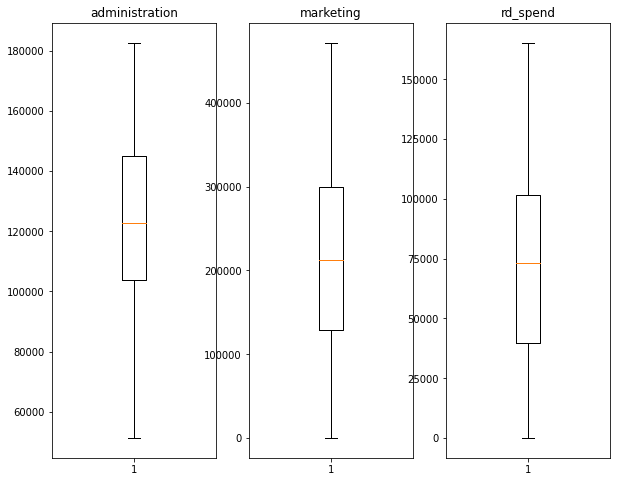

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(131)
plt.boxplot(df['administration'])
plt.title('administration')
plt.subplot(132)
plt.boxplot(df['marketing_spend'])
plt.title('marketing')
plt.subplot(133)
plt.boxplot(df['rd_spend'])
plt.title('rd_spend')
plt.show()


No outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

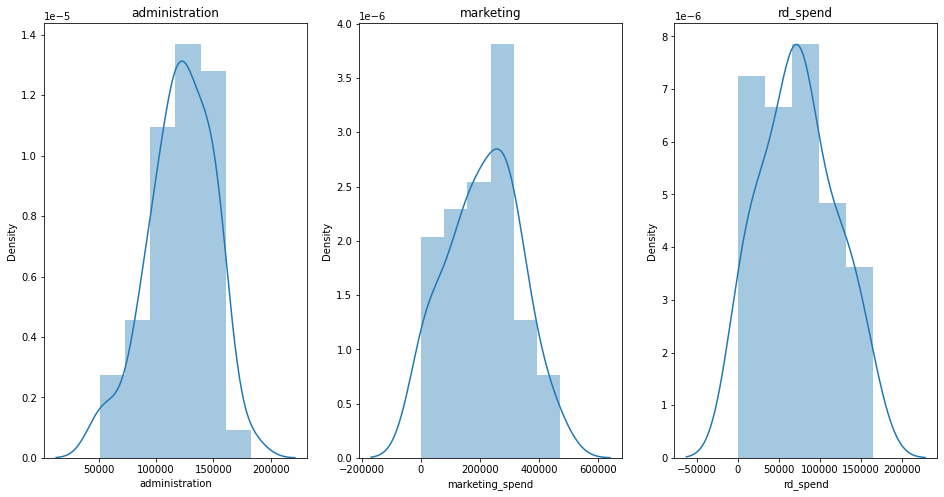

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(131)
sns.distplot(df['administration'])
plt.title('administration')
plt.subplot(132)
sns.distplot(df['marketing_spend'])
plt.title('marketing')
plt.subplot(133)
sns.distplot(df['rd_spend'])
plt.title('rd_spend')
plt.show()


Text(0.5, 1.0, 'marketing')

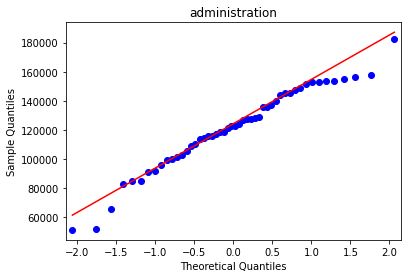

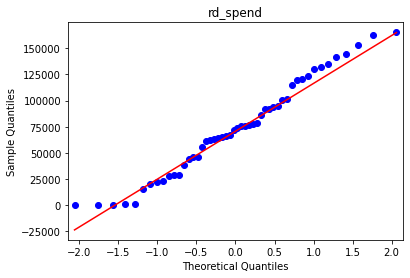

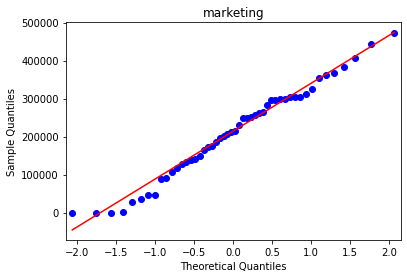

In [12]:
sa.qqplot(df['administration'], line='q')
plt.title('administration')
sa.qqplot(df['rd_spend'], line='q')
plt.title('rd_spend')
sa.qqplot(df['marketing_spend'], line='q')
plt.title('marketing')

Checked for normality.


Check for multicollinearity

In [13]:
df.corr()

,rd_spend,administration,marketing_spend,Profit
rd_spend,1.000000,0.241955,0.724248,0.972900
administration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [14]:
vif_adm = smf.ols('administration~rd_spend+marketing_spend',data=df).fit().rsquared

In [15]:
vif_rd = smf.ols('rd_spend~administration+marketing_spend',data=df).fit().rsquared
vif_mar = smf.ols('marketing_spend~rd_spend+administration',data=df).fit().rsquared

In [16]:
vif_adm = 1/(1-(vif_adm**2))

In [17]:
vif_rd = 1/(1-(vif_rd**2))

In [18]:
vif_mar = 1/(1-(vif_mar**2))

In [19]:
vif_df = {'model':['admin','rd','marketing'], 'vif': [vif_adm,vif_rd,vif_mar]}

In [20]:
pd.DataFrame(vif_df)

,model,vif
0,admin,1.022706
1,rd,1.547939
2,marketing,1.481813


as vif of all the variables are less than 20 we can consider all the independent variables for building the model.

In [21]:
model = smf.ols('Profit~marketing_spend+rd_spend+administration',data=df).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        10:03:19   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
rd_spend            0.8057      0.045     17.846      0.000       0.715       0.897
administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model.params

Intercept          50122.192990
marketing_spend        0.027228
rd_spend               0.805715
administration        -0.026816
dtype: float64

In [24]:
model.pvalues

Intercept          1.057379e-09
marketing_spend    1.047168e-01
rd_spend           2.634968e-22
administration     6.017551e-01
dtype: float64

check for pvalues of marketing and administration by building separate models.

In [25]:
admin_model = smf.ols('Profit~administration',data=df).fit()

In [26]:
admin_model.pvalues

Intercept         0.003824
administration    0.162217
dtype: float64

p-value is insignificant

In [27]:
mar_model = smf.ols('Profit~marketing_spend',data=df).fit()

In [28]:
mar_model.pvalues

Intercept          4.294735e-10
marketing_spend    4.381073e-10
dtype: float64

p-value is significant

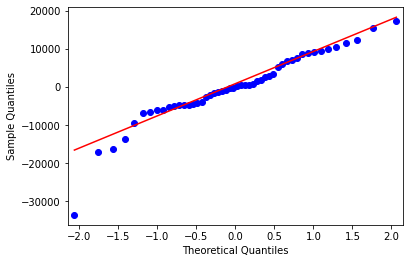

In [29]:
sa.qqplot(model.resid,line='q');

In [30]:
list(np.where(model.resid<-30000))

[array([49])]

In [31]:
def get_standardized_values(vals):
  return ((vals-vals.mean())/vals.std())

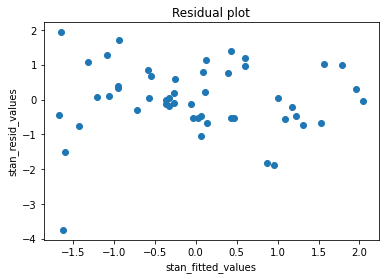

In [32]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('stan_fitted_values')
plt.ylabel('stan_resid_values')
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(df['Profit'],model.fittedvalues))

In [34]:
rmse

8855.344489015139

In [35]:
model_rmse = rmse

In [36]:
model_r2 = model.rsquared

In [37]:
print(model_rmse, model_r2)

8855.344489015139 0.9507459940683246


In [38]:
df3 = df.drop(labels =[47,48,49])

In [39]:
df3

,rd_spend,administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [40]:
df3.drop(labels=[19],inplace=True)

In [41]:
model1 = smf.ols('np.log(Profit)~np.log(marketing_spend)+np.log(rd_spend)+np.log(administration)',data=df3).fit()

In [42]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     39.36
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           2.85e-12
Time:                        10:03:25   Log-Likelihood:                 19.072
No. Observations:                  46   AIC:                            -30.14
Df Residuals:                      42   BIC:                            -22.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.8451      1.316      5.959      0.000       5.188      10.502
np.log(marketing_spend)     0.0195      0.037      0.525      0.602      -0.055       0.094
np.log(rd_spend)            0.2473      0.033      7.439      0.000       0.180       0.314
np.log(administration)      0.0709      0.107      0.660      0.513      -0.146       0.288
==============================================================================
Omnibus:                       11.370   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.255
Skew:                           1.028   Prob(JB):                      0.00360
Kurtosis:                       4.283   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
model1.rsquared

0.7376373888816568

In [44]:
model2 = smf.ols('np.sqrt(Profit)~np.sqrt(marketing_spend)+np.sqrt(rd_spend)+np.sqrt(administration)',data=df3).fit()

In [45]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     169.7
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           1.68e-23
Time:                        10:03:25   Log-Likelihood:                -187.76
No. Observations:                  46   AIC:                             383.5
Df Residuals:                      42   BIC:                             390.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  192.1026     22.554      8.517      0.000     146.587     237.618
np.sqrt(marketing_spend)     0.0316      0.023      1.364      0.180      -0.015       0.078
np.sqrt(rd_spend)            0.5344      0.036     14.969      0.000       0.462       0.606
np.sqrt(administration)     -0.0295      0.061     -0.488      0.628      -0.152       0.093
==============================================================================
Omnibus:                       18.673   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.108
Skew:                           1.307   Prob(JB):                     2.14e-06
Kurtosis:                       5.605   Cond. No.                     6.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
model3 = smf.ols('np.cbrt(Profit)~np.cbrt(marketing_spend)+np.cbrt(rd_spend)+np.cbrt(administration)',data=df3).fit()

In [47]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Profit)   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     107.9
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           9.02e-20
Time:                        10:03:26   Log-Likelihood:                -89.329
No. Observations:                  46   AIC:                             186.7
Df Residuals:                      42   BIC:                             194.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   28.7315      3.850      7.462      0.000      20.961      36.502
np.cbrt(marketing_spend)     0.0339      0.028      1.201      0.236      -0.023       0.091
np.cbrt(rd_spend)            0.4388      0.036     12.063      0.000       0.365       0.512
np.cbrt(administration)     -0.0030      0.073     -0.040      0.968      -0.151       0.145
==============================================================================
Omnibus:                       24.484   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.600
Skew:                           1.559   Prob(JB):                     3.41e-10
Kurtosis:                       6.608   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
y_pred = model.fittedvalues
y_pred1 = np.exp(model1.fittedvalues)
y_pred2 = np.square(model2.fittedvalues)
y_pred3 = pow(model3.fittedvalues,3)

In [49]:
rmse = np.sqrt(mean_squared_error(df['Profit'],y_pred))
rmse2 = np.sqrt(mean_squared_error(df3['Profit'],y_pred2))
rmse3 = np.sqrt(mean_squared_error(df3['Profit'],y_pred3))
rmse1 = np.sqrt(mean_squared_error(df3['Profit'],y_pred1))



In [50]:
dataframe = {'model_name':['regular_model', 'log_tran_model', 'sqrt_tran_model','cbrt_tran_model'], 'Rsquared':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared],'RMSE':[rmse,rmse1,rmse2,rmse3]}

In [51]:
Tabulated_values = pd.DataFrame(dataframe)

In [52]:
Tabulated_values

,model_name,Rsquared,RMSE
0,regular_model,0.950746,8855.344489
1,log_tran_model,0.737637,18400.464771
2,sqrt_tran_model,0.923797,9354.257952
3,cbrt_tran_model,0.885196,11396.855059


By comparing the R2 and RMSE values regular model is the best model.

Residual analysis

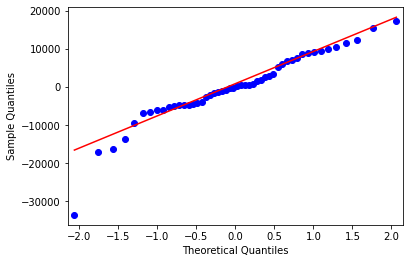

In [53]:
sa.qqplot(model.resid,line='q');

In [54]:
list(np.where(model.resid<-30000))

[array([49])]

In [55]:
def get_standardized_values(vals):
  return ((vals-vals.mean())/vals.std())

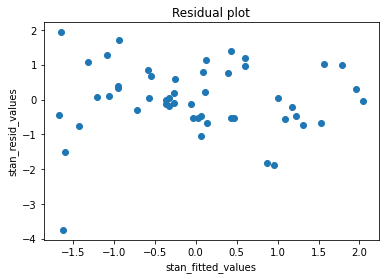

In [56]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('stan_fitted_values')
plt.ylabel('stan_resid_values')
plt.show()

In [57]:
from statsmodels.graphics.regressionplots import influence_plot

Let us check for residuals vs exogenous variables.

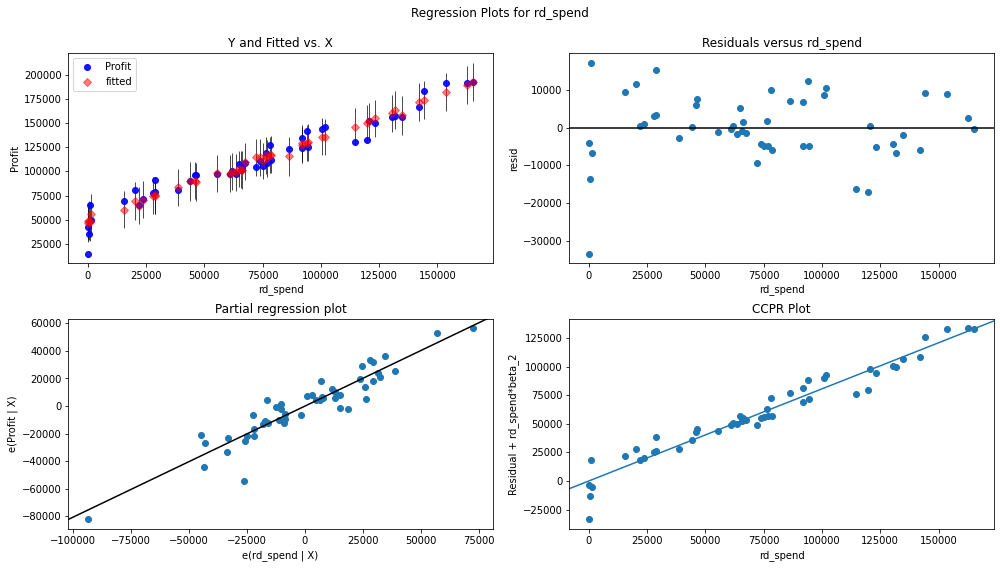

In [58]:
sa.graphics.plot_regress_exog(model,'rd_spend', plt.figure(figsize=(14,8)));

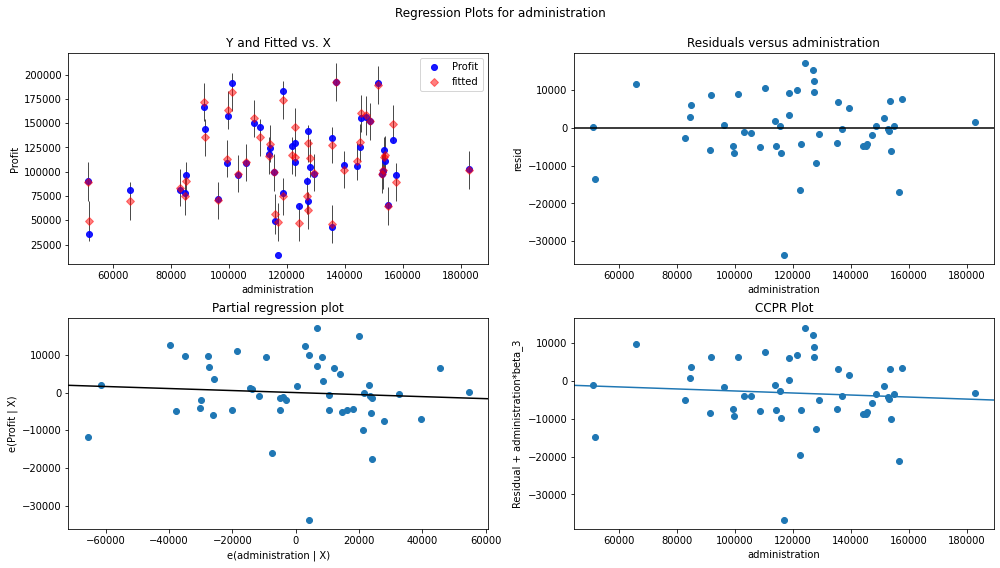

In [59]:
sa.graphics.plot_regress_exog(model,'administration', plt.figure(figsize=(14,8)));

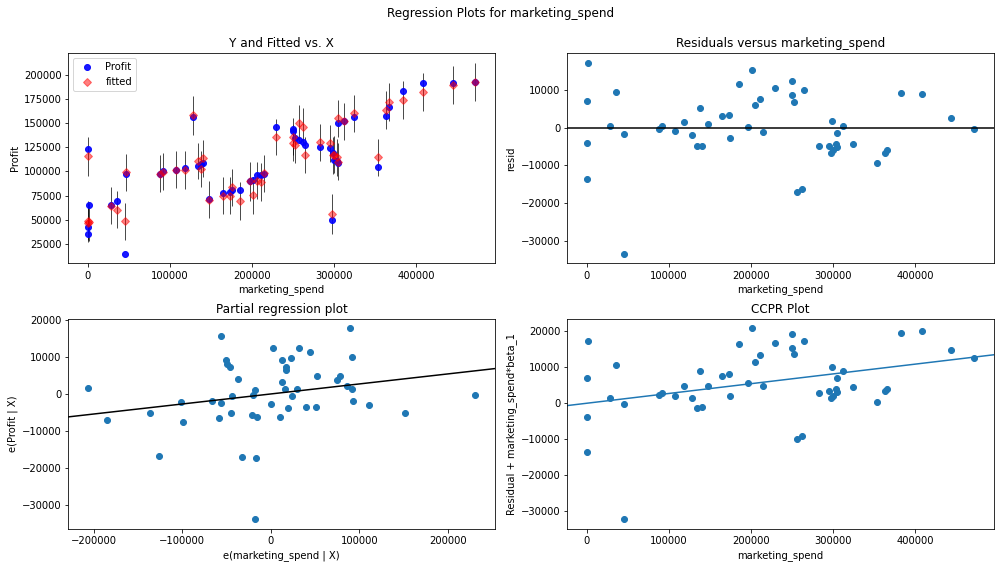

In [60]:
sa.graphics.plot_regress_exog(model,'marketing_spend', plt.figure(figsize=(14,8)));

In [61]:
(c,_) = model.get_influence().cooks_distance

In [62]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


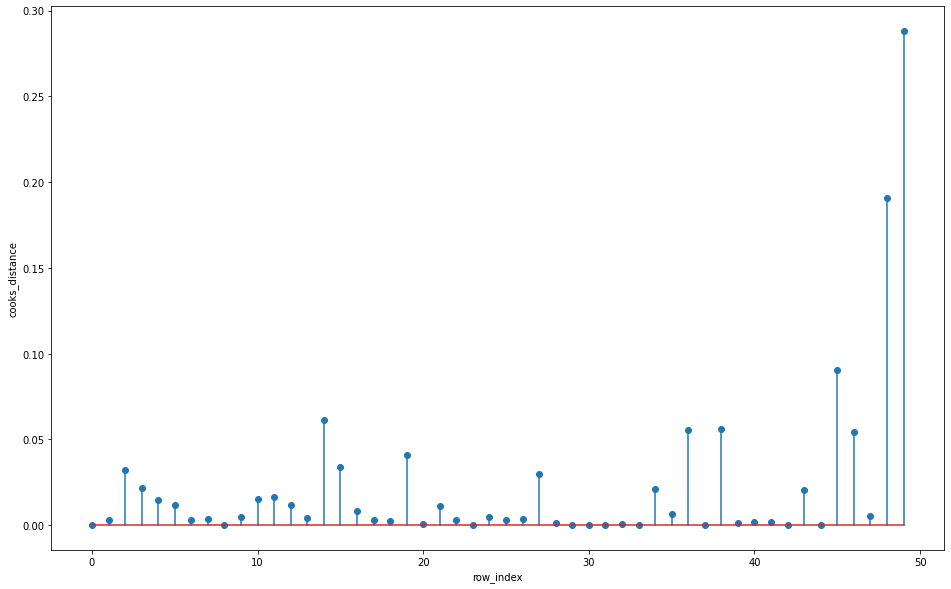

In [63]:
plt.figure(figsize=(16,10))
plt.stem(np.arange(len(df)), np.round(c,5))
plt.xlabel('row_index')
plt.ylabel('cooks_distance')
plt.show()


In [64]:
np.argmax(c), np.max(c)

(49, 0.2880822927543274)

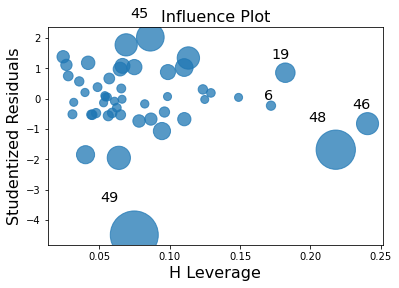

In [66]:
influence_plot(model);

In [68]:
df.shape

(50, 5)

In [70]:
k = df.shape[1]
n =  df.shape[0]

In [71]:
leverage_cutoff = (3*(k+1))/n

In [72]:
leverage_cutoff

0.36

from influence plot we can see that 49th data set are having maximum negative influence on the regression model.

In [73]:
df_new = df.drop(labels=[49],axis=0).reset_index(drop=True)

In [74]:
df_new

,rd_spend,administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [75]:
while np.max(c)>0.5:
  model_new = smf.ols("Profit~rd_spend+marketing_spend+administration", data=df_new).fit()
  (c,_)= model_new.get_influence().cooks_distance
  c
  np.argmax(c), np.max(c)
  df_new = df_new.drop(labels=[np.argmax(c)],axis=0).reset_index(drop=True)
  df_new
else:
  final_model = smf.ols("Profit~rd_spend+marketing_spend+administration", data=df_new).fit()
  final_model.rsquared, final_model.aic
  print('The accuracy is improved to', final_model.rsquared)


The accuracy is improved to 0.9613162435129847


In [76]:
new_dataset = {'rd_spend':[200000],'marketing_spend':[280000],'administration':[12000]}
new_dataset =pd.DataFrame(new_dataset)

In [77]:
new_dataset

,rd_spend,marketing_spend,administration
0,200000,280000,12000


In [78]:
final_model.predict(new_dataset)

0    215781.811974
dtype: float64

In [79]:
y_pred_final = final_model.predict(df_new)

In [80]:
y_pred_final

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [81]:
Tabulated_values

,model_name,Rsquared,RMSE
0,regular_model,0.950746,8855.344489
1,log_tran_model,0.737637,18400.464771
2,sqrt_tran_model,0.923797,9354.257952
3,cbrt_tran_model,0.885196,11396.855059


In [82]:
rmse_final = np.sqrt(mean_squared_error(df_new['Profit'],y_pred_final))

In [86]:
r_sq = {'model_name': 'final_model', 'Rsquared':final_model.rsquared,'RMSE':rmse_final}

In [87]:
Tabulated_values.append(r_sq, ignore_index=True)

,model_name,Rsquared,RMSE
0,regular_model,0.950746,8855.344489
1,log_tran_model,0.737637,18400.464771
2,sqrt_tran_model,0.923797,9354.257952
3,cbrt_tran_model,0.885196,11396.855059
4,final_model,0.961316,7430.589094
